        Date  PX_LAST
0 2022-12-30  3839.50
1 2023-01-03  3824.14
2 2023-01-04  3852.97
3 2023-01-05  3808.10
4 2023-01-06  3895.08


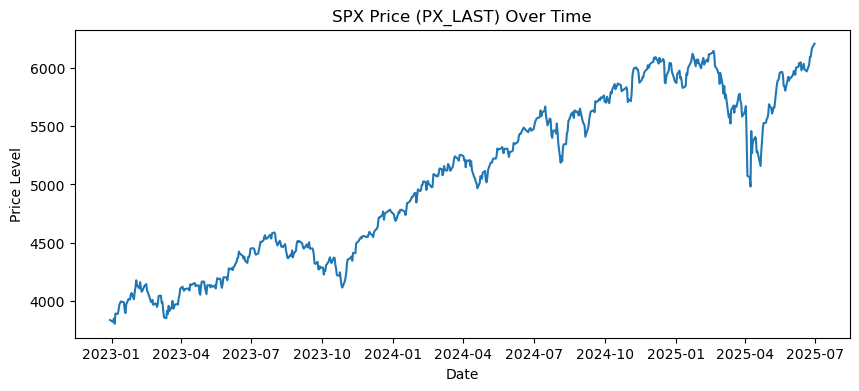

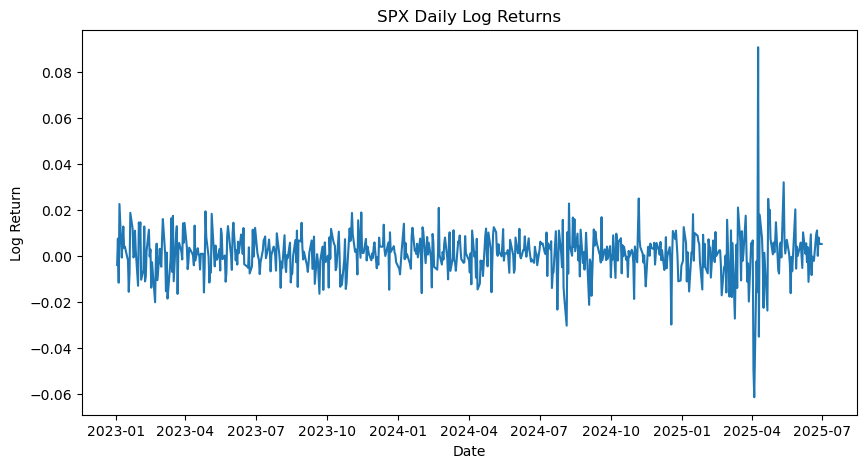

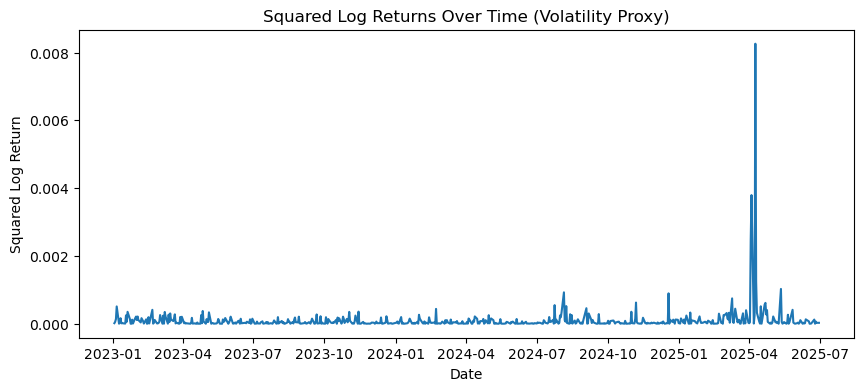

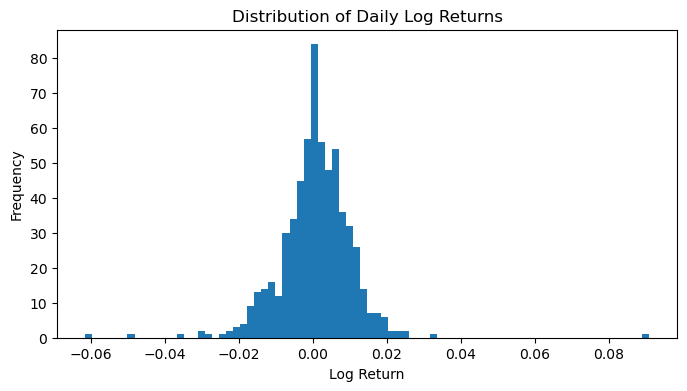

ADF Statistic: -14.133388901870939
p-value: 2.312568086584888e-26


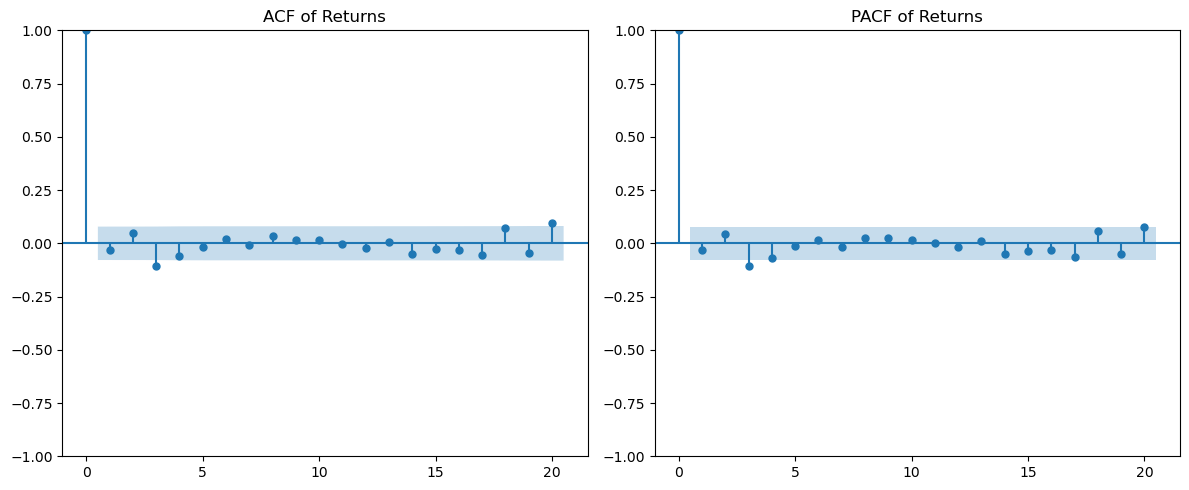

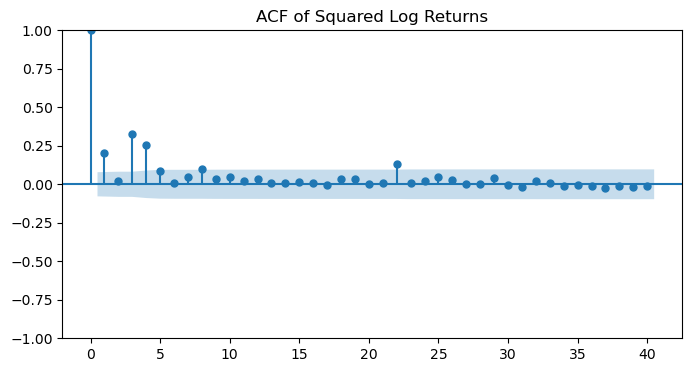

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


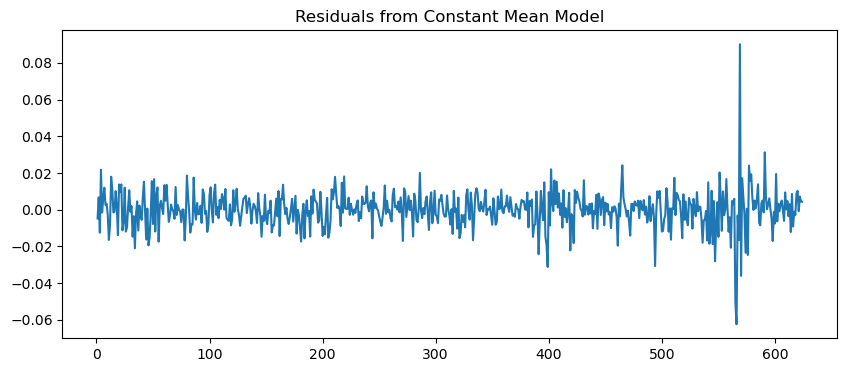

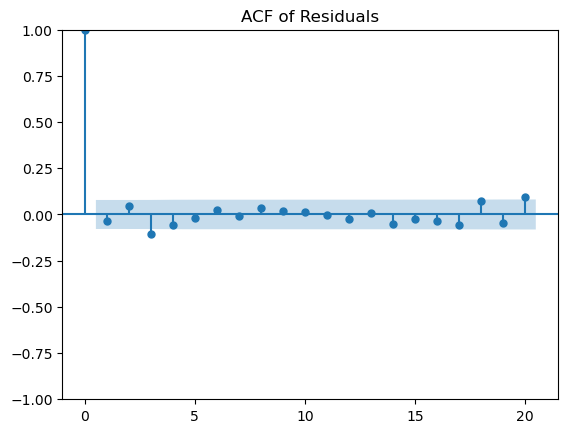

      lb_stat  lb_pvalue
10  13.181865   0.213681
20  28.958013   0.088589


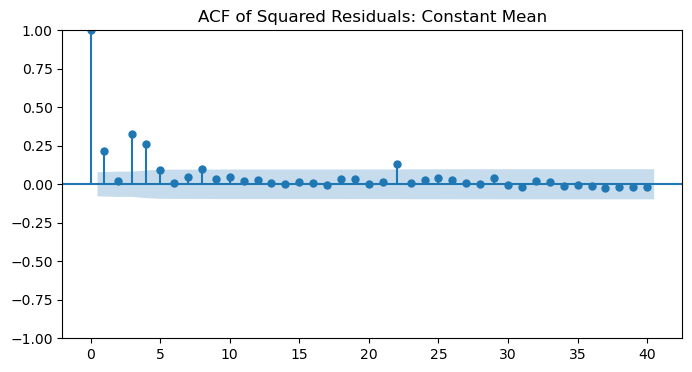

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Constant mean AIC: -3982.976271706223
AR(1) AIC: -3981.654266226848

Constant mean BIC: -3974.103970969484
AR(1) BIC: -3968.3458151217396


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


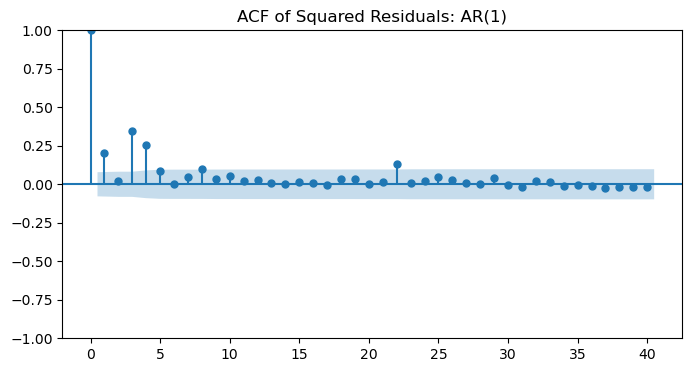

In [5]:
import pandas as pd
import numpy as np

##Uploading Dataset##
file_path = "/Users/oliviadittrich/Desktop/Spring 2026/FIM 601/Project/Data/Final_Mean_Data.xlsx"

df = pd.read_excel(file_path, engine="openpyxl")

print(df.head())

##Check column names##
df.columns
import pandas as pd
import numpy as np

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").copy()

##Plotting Price Levels##
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

plt.figure(figsize=(10,4))
plt.plot(df["Date"], df["PX_LAST"])
plt.title("SPX Price (PX_LAST) Over Time")
plt.xlabel("Date")
plt.ylabel("Price Level")
plt.show()


##Calculating Log Returns##
df["log_return"] = np.log(df["PX_LAST"]) - np.log(df["PX_LAST"].shift(1))

## Dropping 12/30 is NaN because there is no previous day to compare to for the log return calculation.##
df = df.dropna(subset=["log_return"])
 
##Descriptive Statistics for Log Returns##
df["log_return"].describe()

##Plot Returns##
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["log_return"])
plt.title("SPX Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()

##Volatility Proxy: Squared Log Returns##
df["log_return_sq"] = df["log_return"]**2

plt.figure(figsize=(10,4))
plt.plot(df["Date"], df["log_return_sq"])
plt.title("Squared Log Returns Over Time (Volatility Proxy)")
plt.xlabel("Date")
plt.ylabel("Squared Log Return")
plt.show()

##Distribution of Log Returns##
plt.figure(figsize=(8,4))
plt.hist(df["log_return"], bins=80)
plt.title("Distribution of Daily Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()


##ADF Test for Stationarity##
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["log_return"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

##Check autocorrelation (ACF & PACF)##
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_acf(df["log_return"], lags=20, ax=plt.gca())
plt.title("ACF of Returns")

plt.subplot(1,2,2)
plot_pacf(df["log_return"], lags=20, ax=plt.gca())
plt.title("PACF of Returns")

plt.tight_layout()
plt.show()

##ACF of Squared Log Returns##
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8,4))
plot_acf(df["log_return_sq"], lags=40, ax=plt.gca())
plt.title("ACF of Squared Log Returns")
plt.show()

##Fitting ARIMA Model##
from statsmodels.tsa.arima.model import ARIMA

y = df["log_return"]

model_0 = ARIMA(y, order=(0,0,0)).fit()
model_0.summary()

resid_0 = model_0.resid
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(resid_0)
plt.title("Residuals from Constant Mean Model")
plt.show()

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(resid_0, lags=20)
plt.title("ACF of Residuals")
plt.show()

from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(resid_0, lags=[10,20], return_df=True)
print(lb_test)


##ACF of Squared Residuals##
resid_0 = model_0.resid
plt.figure(figsize=(8,4))
plot_acf(resid_0**2, lags=40, ax=plt.gca())
plt.title("ACF of Squared Residuals: Constant Mean")
plt.show()


##Fit AR(1) and compare BIC/AIC##
from statsmodels.tsa.arima.model import ARIMA

y = df["log_return"]  # or use y if you already defined it

model_1 = ARIMA(y, order=(1,0,0)).fit()

print("Constant mean AIC:", model_0.aic)
print("AR(1) AIC:", model_1.aic)

print("\nConstant mean BIC:", model_0.bic)
print("AR(1) BIC:", model_1.bic)

##ACF of AR(1) Residuals##
resid_1 = model_1.resid
plt.figure(figsize=(8,4))
plot_acf(resid_1**2, lags=40, ax=plt.gca())
plt.title("ACF of Squared Residuals: AR(1)")
plt.show()